In [1]:
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt

Arreglo uniforme
 ---------------
 
 
 esto es un Titulo

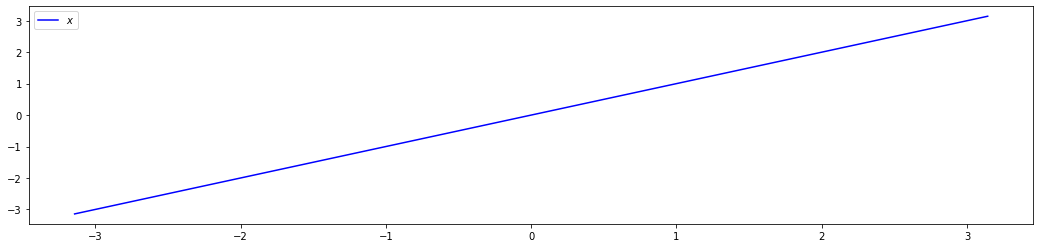

In [2]:
N = 2**10 + 1 # 1025
L = np.pi 
w0 = 2
t = np.linspace(-L, L, N)
w = np.copy(t) 

fig, ax = plt.subplots(1,1,figsize=(18,4))
o1 = ax.plot(t, t, 'b-',  label='$x$')
ax.legend()

 Ejercicio 1 - Transformada de Fourier y Representacion Frecuencial
 ---------------

1. item 1

2. Usando la escritura de seno con expoennciales complejas, si $x(t) = 2*\sin(f_0t)$, entonces

$$\hat x(\omega) = \frac{\delta(\omega-\omega_0) - \delta(\omega+\omega_0)}{2i}  $$

y luego

$$|\hat x(\omega)| = \frac{\delta(\omega-\omega_0) + \delta(\omega+\omega_0)}{2}  $$

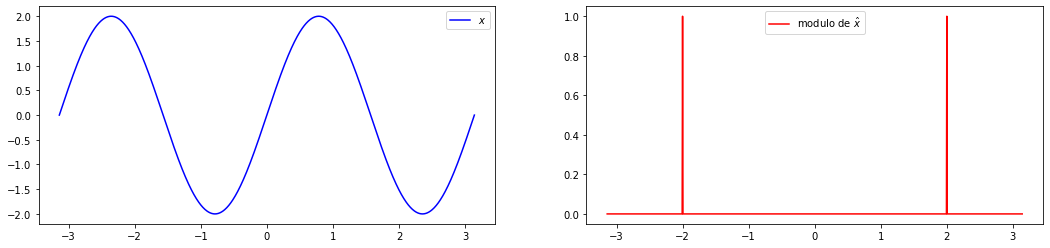

In [3]:
x = 2*np.sin(w0*t)
n_w0 = int((L+w0) * N/(2*L))
minus_n_w0 = int((L-w0) * N/(2*L))
xhatmod = 2*0.5*signal.unit_impulse(N, n_w0) + 2*0.5*signal.unit_impulse(N, minus_n_w0)

fig, ax = plt.subplots(1,2,figsize=(18,4))
o1 = ax[0].plot(t, x, 'b-',  label='$x$')
o2 = ax[1].plot(w, xhatmod, 'r-', label='modulo de $\hat x$')
ax[0].legend()
ax[1].legend()

 Ejercicio 2 - Transformada de Fourier y Representacion Frecuencial
 ---------------

1.  Si $x(t) = e^{-at}\gamma(t)$, entonces



\begin{eqnarray}
  \hat x(\omega) &=& \int_0^\infty e^{-at} e^{-i \omega t} dt  \\
                 &=& \int_0^\infty e^{-(a +i \omega) t} dt \\
                 &=& \left[ \frac{e^{-(a +i \omega) t}}{-(a +i \omega)} \right]_0^\infty \\
                 &=&  \frac{1}{(a +i \omega)}
\end{eqnarray}  

In [4]:
for a in [1, .1, .01]:
    x = np.exp(-a*t) 
    x[:int(N/2)-1] = 0
    xhat = 1/(a+1j*omega)

    fig, ax = plt.subplots(1,2,figsize=(18,4))
    o1 = ax[0].plot(t, x, 'b-', label='$x$')
    o2 = ax[1].plot(w, np.real(xhat), 'g-', label='parte real de $\hat x$')
    o2 = ax[1].plot(w, np.imag(xhat), 'm-', label='parte imaginaria de $\hat x$')
    o2 = ax[1].plot(w, np.abs(xhat), 'r-', label='modulo de $\hat x$')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(f'$a = {a}$')
    ax[1].set_title(f'$a = {a}$')

NameError: name 'omega' is not defined

Ejercicio 3 - Filtro medio
---------------

Definimos la función rectangular por 

\begin{equation}
\label{rect}
    \Pi_T(t) =     \begin{cases}
      \frac 1T & \text{si } |t| < \frac{T}{2}\\
      \frac 1{2T} & \text{si } |t| = \frac{T}{2}  \\
      0 & \text{si no}
    \end{cases} \,.
\end{equation}

El filtro medio, parametrizado por $T>0$, calcula el promedio de la señal en una ventana deslizante de largo $T$. 

1. Su respuesta impulsional es la la función rectangular definida por:

\begin{equation}
\label{rect}
    h(t) = \Pi_T(t - T/2) \,.
\end{equation}


In [20]:
N = 8*2**10 + 1 # 1025
L = 4*np.pi 

t = np.linspace(-L, L, N)
w = t


T = np.pi/2

h = np.zeros_like(t)

n_zero = int(N/2)-1
n_min = n_zero - int(T * N/(2*L))
n_max = n_zero + int(T * N/(2*L))
h[n_min:n_zero] = 1/T
h[n_zero] = 1/(2*T)
h[n_zero+1:n_max] = 1/T

2. Para encontrar la respuesta impulsional, calculamos la transformada de Fourier de $h$:

\begin{eqnarray}
\label{rect}
    \mathcal F (h)(\omega) &=& \frac 1T \int_{-T/2}^{T/2} e^{-i\omega t} dt \\
    &=& \left[ - \frac{e^{-i\omega t}}{i\omega T} \right]_{-T/2}^{T/2} \\
    &=& \frac{e^{-i\omega T} - e^{-i\omega -T}}{i\omega T}  \\
    &=& \frac{\sin(\omega T)}{\omega T} \\
    &=& \text{sinc}(\omega T)
\end{eqnarray}


In [21]:
sc = np.zeros_like(w)
w_zero = int(N/2)-1
sc[w_zero] = 1
sc[:w_zero] = 1/T * np.sin(T*w)[:w_zero]/w[:w_zero]
sc[w_zero+1:] = 1/T * np.sin(T*w)[w_zero+1:]/w[w_zero+1:]

<ipython-input-21-fc0ce5a6e1c8>:5: RuntimeWarning: invalid value encountered in true_divide
  sc[w_zero+1:] = 1/T * np.sin(T*w)[w_zero+1:]/w[w_zero+1:]


Text(0.5, 1.0, 'respuesta impusional filtro medio')

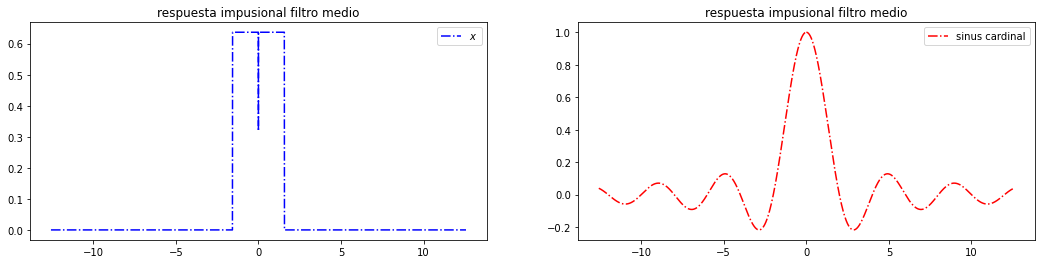

In [22]:
fig, ax = plt.subplots(1, 2,figsize=(18,4))
ax[0].plot(t, h, 'b-.',  label='$x$')
ax[0].legend()
ax[0].set_title('respuesta impusional filtro medio')

ax[1].plot(w, sc, 'r-.',  label='sinus cardinal')
ax[1].legend()
ax[1].set_title('respuesta impusional filtro medio')

Ejercicio 4 - Diagrama de Bode
---------------

Un diagrama de Bode es una representación gráfica que sirve para caracterizar la función de transferencia $H$ de un sistema. Escribiendo la función de transferencia compleja como

$$ H(w) = |H(w)|e^{i\arg(H(w))} $$

el diagrama consta de dos gráficas separadas  de ordenadas en escala logarítmica de $w$ expresada en radianes por segundo (rad/s) y de ordenadas:

* Magnitud (o ganancia) en decibeles (dB)
$$G (w) = 20 \log_{10} (|H(w)|)$$

* Fase en grados
$$\Phi(w) = \arg(H(w)) = \tan^{-1} \left( \frac{Im(H(w))}{Re(H(w))} \right)$$


Text(0.5, 0, 'Frecuencia (rad/sec)')

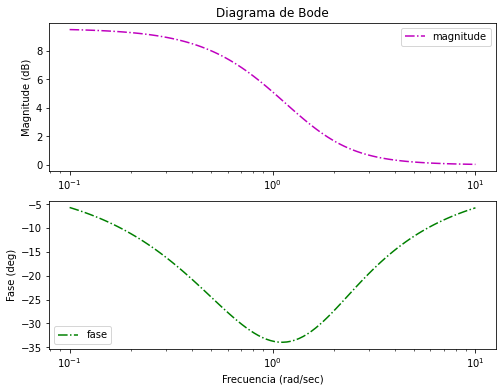

In [45]:
sys = signal.TransferFunction([1, 3, 3], [1, 2, 1])
w, mag, phase = signal.bode(sys)

fig, ax = plt.subplots(2, 1,figsize=(8,6))
ax[0].semilogx(w, mag, 'm-.',  label='magnitude')
ax[1].semilogx(w, phase, 'g-.',  label='fase')
ax[0].set_title('Diagrama de Bode')
ax[0].legend()
ax[0].set_ylabel('Magnitude (dB)')
ax[1].legend()
ax[1].set_ylabel('Fase (deg)')
ax[1].set_xlabel('Frecuencia (rad/sec)')

### Sistema eléctrico de primer orden

Salida del sistema en función de la entrada: 

$$x(t) = RCy'(t) + y(t)$$

Usando las propriedades de la Transformada de Fourier, la respuesta frecuencial:

$$H(\omega) = \frac{Y(\omega)}{X(\omega)} = \frac{1}{RC i \omega }$$

que la rescribimos

$$H(\omega) = \frac{1}{1+i\frac{\omega}{\omega_c}}$$

con $\omega_0 = 1 / RC$.

### Modulo de la función de transferencia


$$|H(\omega)| = \frac{1}{\sqrt{1+i\frac{\omega^2}{\omega_c^2}}}$$

$$G(\omega) =  20 \log_{10} (|H(w)|) = -10 \log_{10}\left( 1+\frac{\omega^2}{\omega_c^2} \right)$$

$$ \lim_{\omega \to 0} G(\omega) = 0$$

$$ \lim_{\omega \to \infty} G(\omega) = -10 \log_{10} \left( \frac{\omega^2}{\omega_c^2} \right)  = -20 \log_{10} \left(\omega \right) + 20 \log_{10} \left(\omega_c \right)$$


Cuando $\omega=\omega_c$, $G(\omega) = -10 \log_{10} (2) = -3 \text{dB}$.

Text(0, 0.5, 'Magnitude (dB)')

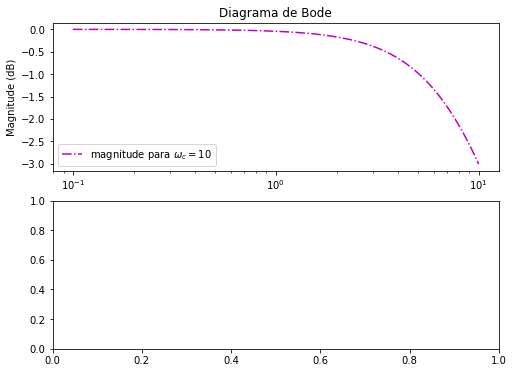

In [55]:
wc = 10
fig, ax = plt.subplots(2, 1,figsize=(8,6))
G = np.copy(w)
G = -10 * np.log10(1+w**2/wc**2)
ax[0].semilogx(w, G, 'm-.',  label=f'magnitude para $\omega_c = {wc}$')
ax[0].set_title('Diagrama de Bode')
ax[0].legend()
ax[0].set_ylabel('Magnitude (dB)')
